# Depth Complexity

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator
import matplotlib.colors as mcolors
from random import shuffle
import matplotlib
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [67]:
COLORS = ['dimgrey', 'navy', 'firebrick']

In [45]:
ROOT = '../data/DS'
STATES = ['GHZ', 'XY']
NUM_DEPTHS = 5
L_SET = [3,4,5]
NRUN = 10
queries = np.zeros((len(STATES), len(L_SET), NUM_DEPTHS, NRUN))
for s, STATE in enumerate(STATES):
    for i, L in enumerate(L_SET):
        for j in range(NUM_DEPTHS):
            queries[s,i,j] = np.load(f'{ROOT}/{STATE}/L{L}/queries_{j}_{STATE}.npy')

In [46]:
avgs = np.mean(queries, axis=-1)
stdevs = np.std(queries, axis=-1)
x = np.arange(NUM_DEPTHS)
avgs /= 10**5
stdevs /= 10**5

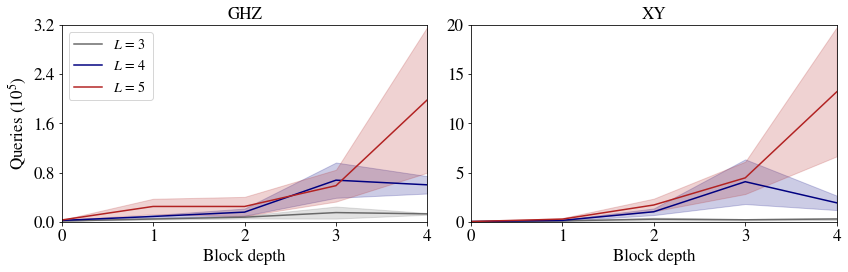

In [91]:
FONT_SIZE = 17
_, axes = plt.subplots(ncols=2, figsize=(12,4))
plt.rc('font', size=14)

for i, ax in enumerate(axes):
    for j, L in enumerate(L_SET):
        ax.plot(x, avgs[i,j], label=rf'$L \,=\, ${L}', c=COLORS[j])
        ax.fill_between(x, avgs[i,j] - stdevs[i,j], avgs[i,j] + stdevs[i,j], alpha=0.2, color=COLORS[j])
        ax.xaxis.set_major_locator(MultipleLocator(1))
        ax.yaxis.set_major_locator(MaxNLocator(4)) 
        ax.set_xlabel("Block depth", fontsize=FONT_SIZE)
        ax.tick_params(axis='both', labelsize=FONT_SIZE)
        ax.set_xlim(0, L-1)
        ax.set_title(f"{STATES[i]}", fontsize=FONT_SIZE)
        ax.set_ylim(0, 3.2 if i == 0 else 20)

axes[0].set_ylabel(r"Queries ($10^5$)", fontsize=FONT_SIZE)
axes[0].legend(loc='upper left')
plt.tight_layout()
plt.savefig(f'/Users/jonathanlu/Documents/data_sym/DS.pdf')